## *This script contains:*
### 1. Importing Libraries and Dataset
### 2. Visualizing Variables for Further Analysis
### 3. Data prep for regression analysis
### 4. Regression analysis
#### 4.1 Regression Analysis on hypothesis 1
#### 4.2. Trying "multiple linear regression model for Hypothese 1
#### 4.3 Regression Analysis on hypothesis 2

# 1.Importing Libraries and Dataset

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Import the house sales data
path = r'C:\Users\hp\House Sales in King County, USA'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_for_visualizations.csv'), index_col = False)

In [7]:
df.shape

(21612, 24)

In [9]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'house_age',
       'years_since_renovation', 'price_category'],
      dtype='object')

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,house_age,years_since_renovation,price_category
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,188.050847,69,69,Middle price
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,209.338521,73,33,Middle price
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,233.766234,91,91,Middle price
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,308.163265,59,59,Middle price
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,303.571429,37,37,Middle price


# 2. Visualizing Variables for Further Analysis

Based on the latest correlation heatmap, the variables with the highest correlation with price are sqft_living and grade.

**visualizing three variables simultaneously—price, sqft_living, and grade—by encoding sqft_living on the x-axis, price on the y-axis, and grade with color. 
This plot can reveal patterns and interactions between grade and sqft_living on price, which would be harder to see in separate plots. For instance, you can observe if higher-grade properties tend to have higher price even at similar sqft_living levels.
this enhanced scatter plot provides a more comprehensive view of how multiple variables influence price.**

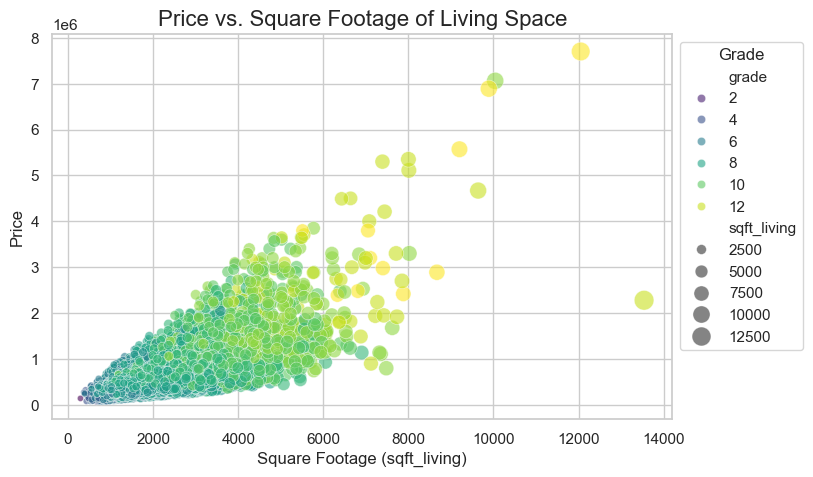

In [145]:
sns.set(style="whitegrid")
# Create the scatter plot with enhancements
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', alpha=0.6, size='sqft_living', sizes=(20, 200), palette="viridis")

# Title and labels
plt.title('Price vs. Square Footage of Living Space', fontsize=16)
plt.xlabel('Square Footage (sqft_living)', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the legend and plot
plt.legend(title="Grade", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [149]:
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Price_vs_sqft_living.png'),bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

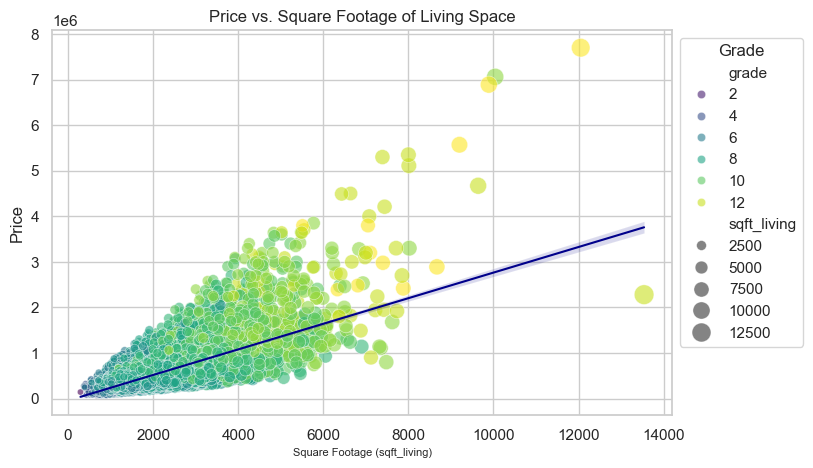

In [143]:
sns.set(style="whitegrid")
# Create the scatter plot with enhancements
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', alpha=0.6, size='sqft_living', sizes=(20, 200), palette="viridis")
# Add a regression line
sns.regplot(data=df, x='sqft_living', y='price', scatter=False, color="darkblue", line_kws={"linewidth": 1.5})
# Title and labels
plt.title('Price vs. Square Footage of Living Space', fontsize=12)
plt.xlabel('Square Footage (sqft_living)', fontsize=8)
plt.ylabel('Price', fontsize=12)

# Show the legend and plot
plt.legend(title="Grade", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# 3. Data prep for regression analysis 

In [36]:
# Define variables
X1 = df['sqft_living'] # Independent variable
y1 = df['price'] # Dependent variable

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X1 =df['sqft_living'].values.reshape(-1,1)
y1 = df['price'].values.reshape(-1,1)

In [44]:
X1,y1

(array([[1180],
        [2570],
        [ 770],
        ...,
        [1020],
        [1600],
        [1020]], dtype=int64),
 array([[221900.],
        [538000.],
        [180000.],
        ...,
        [402101.],
        [400000.],
        [325000.]]))

In [46]:
# Split the data into two sets: a training set and a test set.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=0)

# 4. Regression analysis

## 4.1 Regression Analysis on hypothesis 1

### Hypothesis 1: Larger living space and a higher home grade are associated with higher house prices.

In [59]:
# Create a regression object.

regression1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [61]:
# Fit the regression object onto the training set.
regression1.fit(X1_train, y1_train)

LinearRegression()

In [63]:
# Predict the values of y1 using X1 
y1_predicted = regression1.predict(X1_test)

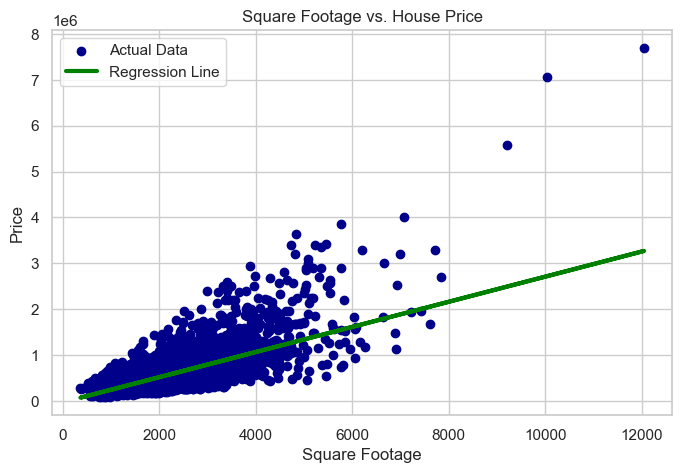

In [151]:
# Create a plot that shows the regression line from the model on the test set.
plt.figure(figsize=(8, 5))
plt.scatter(X1_test, y1_test, color='darkblue', label='Actual Data')
plt.plot(X1_test, y1_predicted, color='green', linewidth=3, label='Regression Line')
plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [69]:
# Create objects that contain the model summary statistics.
mse_1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
rmse_1 = np.sqrt(mse_1) # This is the root square mean (same unit as the dependent variable 'price')
r2_1 = r2_score(y1_test, y1_predicted)

In [71]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:', regression1.coef_)
print('Root mean squared error:', rmse_1)
print('R2 score:', r2_1)

Slope: [[273.89070913]]
Root mean squared error: 269964.55693612085
R2 score: 0.5058122429182601


**Slope (273.89): This indicates that for every additional square foot of living space, the predicted house price increases by approximately $273.89.
Root Mean Squared Error (RMSE) (269,964.56): This measures how much the predicted prices deviate from the actual values on average. A lower value means better accuracy.
R2 Score (0.506): This means about 50.6% of the variation in house prices can be explained by the square footage of the living space.**

In [75]:
# Check
data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,900000.0,1.028987e+06
1,405000.0,3.196096e+05
2,780000.0,9.084746e+05
3,379950.0,6.844320e+05
4,1060000.0,7.879627e+05
5,627000.0,5.250276e+05
6,279000.0,5.359832e+05
7,453000.0,4.675106e+05
8,290000.0,3.689099e+05
9,792000.0,8.783466e+05


**The predictions are close but not perfect, and there's a significant variation between actual and predicted values, suggesting that other factors, like home grade, location, and age, might also play a role in the price that the model doesn't account for.**

## 4.2. Trying "multiple linear regression model for Hypothese 1

In [86]:
# Prepare features and target variable
X = df[['sqft_living', 'grade']]  # Features: sqft_living and grade
y = df['price']  # Target: price

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output the results
print("Slope (coefficients):", model.coef_)
print("Intercept:", model.intercept_)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Create a DataFrame for the actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(30))  # Display the first 30 rows

Slope (coefficients): [  184.47197559 97038.33279883]
Intercept: -587391.7451827461
Root Mean Squared Error (RMSE): 263951.4092865023
R² Score: 0.5363457052769451
          Actual     Predicted
735     365000.0  5.707719e+05
2830    865000.0  7.238836e+05
4106   1040000.0  1.175489e+06
16218   590000.0  6.751891e+05
20878   352800.0  5.209645e+05
1227    211000.0  4.073237e+05
18229   235000.0  4.460628e+05
19368   680000.0  4.239261e+05
20163   384500.0  4.840701e+05
7139    605000.0  2.597461e+05
2174    638000.0  5.264986e+05
13342   385000.0  4.479075e+05
15468   175000.0  3.519821e+05
7662    365000.0  4.534417e+05
16941   427000.0  4.349945e+05
5304   1070000.0  1.241899e+06
6377    800000.0  3.556715e+05
12319   795127.0  1.187289e+06
18834   355000.0  3.575162e+05
5337    474000.0  5.504800e+05
3018    485000.0  4.442181e+05
1807    930000.0  1.533365e+06
10110   920000.0  7.637357e+05
7609    560000.0  7.035917e+05
20692   654000.0  4.711570e+05
13958   549000.0  5.431011e+05


## 4.3 Regression Analysis on hypothesis 2

#### **Hypothesis 2:** If the square footage of living space exceeds 3,000 sqft, then house prices will increase with less than 3,000 square feet of living space. 

In [95]:
# Split the data into subsets for houses <= 3000 sqft and > 3000 sqft
sub_large = df[df['sqft_living'] > 3000]
sub_small = df[df['sqft_living'] <= 3000]

In [97]:
## Convert the variables into arrays
# For houses <= 3000 sqft
X_small = sub_small[['sqft_living']].values.reshape(-1,1)
y_small = sub_small['price'].values.reshape(-1,1)

# For houses > 3000 sqft
X_large = sub_large[['sqft_living']].values.reshape(-1,1)
y_large = sub_large['price'].values.reshape(-1,1)

In [99]:
# Split the data into training and test sets
# For houses <= 3000 sqft
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size = 0.3, random_state=0)
# For houses > 3000 sqft
X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size = 0.3, random_state=0)

In [101]:
# Create regression object
regression_small = LinearRegression()
regression_large = LinearRegression()

In [103]:
# Fit the models to the training data
regression_small.fit(X_small_train, y_small_train)
regression_large.fit(X_large_train, y_large_train)

LinearRegression()

In [105]:
# Predictions
y_small_predicted = regression_small.predict(X_small_test)
y_large_predicted = regression_large.predict(X_large_test)

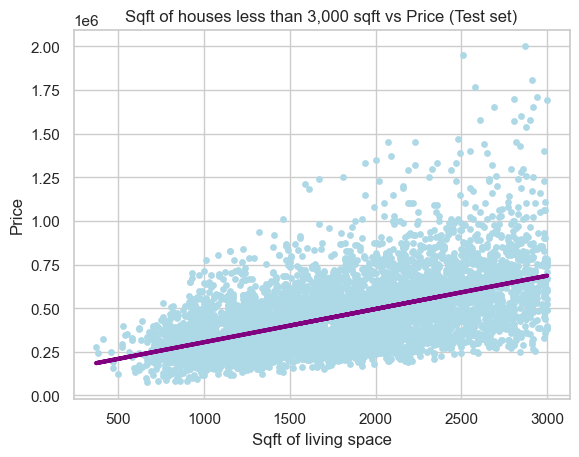

In [111]:
# Create a scatterplot to show the regression line for the 'small subset' (houses <= 3,000 sqft)
plot_small_test = plt
plot_small_test.scatter(X_small_test, y_small_test, color = 'lightblue', s=15)
plot_small_test.plot(X_small_test, y_small_predicted, color = 'purple', linewidth=3)
plot_small_test.title('Sqft of houses less than 3,000 sqft vs Price (Test set)')
plot_small_test.xlabel('Sqft of living space')
plot_small_test.ylabel('Price')
plot_small_test.show()

**Insights:**
- The regression line has a positive slope, indicating a general upward trend between square footage and house price. This suggests that, even for homes below 3,000 sqft, an increase in living space correlates with an increase in price.

- The data points are widely spread around the regression line, especially at higher price levels, indicating a moderate to weak fit. This spread suggests that other factors may also be influencing the house prices significantly, as square footage alone doesn’t fully explain the variations in price.

**Conclusion for Hypothesis 2:** Since this subset only includes homes under 3,000 sqft, it appears that the relationship between size and price in this range is positive but not particularly strong. *To fully test Hypothesis 2, we would need to compare this result with a similar plot for homes over 3,000 sqft and check if the slope for those homes in urban areas is significantly steeper, indicating accelerated price increases.*

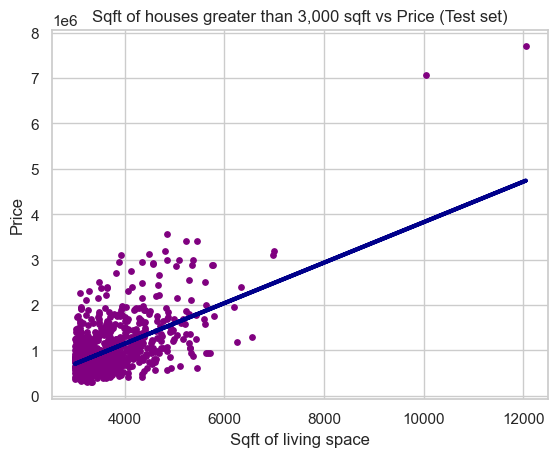

In [115]:
# Create a scatterplot to show the regression line for the 'large subset' (houses > 3,000 sqft)
plot_large_test = plt
plot_large_test.scatter(X_large_test, y_large_test, color = 'purple', s=15)
plot_large_test.plot(X_large_test, y_large_predicted, color = 'darkblue', linewidth=3)
plot_large_test.title('Sqft of houses greater than 3,000 sqft vs Price (Test set)')
plot_large_test.xlabel('Sqft of living space')
plot_large_test.ylabel('Price')
plot_large_test.show()

**Insights:**
- The regression line shows a steeper upward slope compared to the line in the previous plot for houses under 3,000 sqft. This indicates that, as the square footage increases beyond 3,000 sqft, house prices tend to increase at a faster rate. This supports the hypothesis that larger homes (over 3,000 sqft) may experience accelerated price growth.

- While there is still some scatter around the regression line, the concentration of points suggests a stronger correlation in this higher sqft range. However, there are outliers, particularly at very high square footage and price levels, which could be due to other factors influencing the prices of extremely large homes (e.g., location, luxury features).

**Comparison to Houses Under 3,000 sqft:** Compared to the previous plot, the steeper slope in this plot aligns with the hypothesis that larger homes in urban areas experience accelerated price increases. This suggests that square footage has a more pronounced impact on house prices once it exceeds the 3,000 sqft threshold.

### Conclusion for Hypothesis 2
The analysis and visual comparison of these two plots support Hypothesis 2. There is evidence that house prices increase at an accelerated rate when the square footage of living space exceeds 3,000 sqft, especially in urban areas, as suggested by the steeper slope for the larger homes.

In [117]:
# Pull model summary statistics for houses <= 3000 sqft
mse_small = mean_squared_error(y_small_test, y_small_predicted) # This is the mean squared error
rmse_small = np.sqrt(mse_small) # This is the root square mean (same units as the dependent variable 'price')
r2_small = r2_score(y_small_test, y_small_predicted)

# Print summary stats
print('Model Summary Statistics for Houses <= 3000 sqft')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

Model Summary Statistics for Houses <= 3000 sqft
Slope: [[190.40454066]]
Root mean squared error: 180883.58334820493
R2 score: 0.2646683400917098


In [119]:
# Pull model summary statistics for houses > 3000 sqft
mse_large = mean_squared_error(y_large_test, y_large_predicted)
rmse_large = np.sqrt(mse_large)
r2_large = r2_score(y_large_test, y_large_predicted)

# Print summary stats
print('Model Summary Statistics for Houses > 3000 sqft')
print('Slope:', regression_large.coef_)
print('Root mean squared error:', rmse_large)
print('R2 score:', r2_large)

Model Summary Statistics for Houses > 3000 sqft
Slope: [[446.42773996]]
Root mean squared error: 466493.4034891104
R2 score: 0.3945422775782659


In [121]:
 #check for houses <= 3000 sqft
data_small = pd.DataFrame({'Actual': y_small_test.flatten(), 'Predicted': y_small_predicted.flatten()})
data_small.head(30)

,Actual,Predicted
0,315001.0,400262.596258
1,309950.0,402166.641664
2,409000.0,426919.231950
3,325000.0,463096.094675
4,650000.0,552586.228784
5,549000.0,440247.549796
6,465000.0,388838.323818
7,705000.0,685869.407245
8,736000.0,400262.596258
9,180000.0,322196.734588


In [123]:
#check for houses > 3000 sqft
data_large = pd.DataFrame({'Actual': y_large_test.flatten(), 'Predicted': y_large_predicted.flatten()})
data_large.head(30)

,Actual,Predicted
0,2950000.0,1.096464e+06
1,430236.0,8.973577e+05
2,1400000.0,9.312862e+05
3,785000.0,7.928936e+05
4,810000.0,1.221464e+06
5,1680000.0,1.667892e+06
6,595000.0,1.002715e+06
7,605000.0,7.170009e+05
8,579950.0,7.348580e+05
9,832500.0,8.911077e+05


**Insights:**

#### 1- Houses ≤ 3,000 sqft

- Slope: 190.4 - This indicates that for every additional square foot of living space, the price is expected to increase by $190.40, on average.
- Root Mean Squared Error (RMSE): 180,883 - The average deviation between the predicted and actual prices is approximately $180,883, suggesting moderate prediction accuracy.
- R² Score: 0.265 - This low R² score means that only about 26.5% of the variance in house prices for properties under 3,000 sqft can be explained by square footage alone. This indicates that other factors likely play a significant role in determining the prices of these smaller homes.

**The predicted prices generally track with actual prices, but the RMSE and R² suggest that the model has a fair amount of error. The spread of predictions shows that smaller homes' prices are influenced by factors beyond just square footage (e.g., location, renovation, and neighborhood quality).**

#### 2- Houses > 3,000 sqft

- Slope: 446.4 - Here, the slope is more than double that of the smaller homes, suggesting that price sensitivity to square footage increases as homes become larger. For every additional square foot over 3,000 sqft, the price is expected to increase by $446.40 on average.
- Root Mean Squared Error (RMSE): 466,493 - The higher RMSE reflects greater variability and less accuracy in predicting the prices of these larger homes. The deviation from actual prices is much larger in this group.
- R² Score: 0.395 - The R² score is slightly better than for the smaller homes, at 39.5%, but it still shows that square footage alone does not fully explain price variability in this category.

**While the slope is steeper, reflecting a stronger price response to additional square footage, the predictions still show substantial deviation from actual prices. The RMSE of 466,493 suggests that predictions for larger homes are less reliable. Larger homes likely involve more complex factors influencing price, such as luxury features or premium locations.**

### Conclusion
The higher slope for homes over 3,000 sqft aligns with Hypothesis 2, supporting the idea that prices increase at an accelerated rate for larger homes, especially in urban areas. However, both the R² scores and RMSE indicate that square footage alone cannot fully account for price differences, implying that a more complex model incorporating additional features (e.g., location, grade, and condition) would likely yield more accurate predictions for both categories.